# State representation and estimation

We'll explore different state representations and their bearing on state estimation. In particular, we'll explore the full state, error state, and invariant state representations.

As a running example, we'll consider estimating orientation and accelerometer bias for an object at rest (that is, zero velocity/zero angular rate) given noisy accelerometer observations. The accelerometer observation is described by

$
\begin{align}
\mathbf{a}_\mathtt{IMU} = \underbrace{\mathbf{a}_\mathtt{LI}^\mathtt{I}}_{=\mathbf{0}} - \mathrm{R}_\mathtt{IL} \mathbf{g}^\mathtt{L}
    + \mathbf{b}_\mathtt{IMU} + \mathbf{w}_\mathtt{IMU}
\end{align}
$

where $\mathbf{a}_\mathtt{LI}^\mathtt{I}$ is the acceleration of the IMU ($I$) with respect to some locally level frame ($L$) expressed in the IMU frame, $\mathbf{g}^\mathtt{R}$ is the gravity vector expressed in the local frame, and $\mathbf{b}_\mathtt{IMU}$ and $\mathbf{w}_\mathtt{IMU}$ are the bias and noise vectors, respectively. Note that our observation can be written in terms of our unknown state, the IMU orientation with respect to the local frame $\mathrm{R}_\mathtt{LI}$ and the accelerometer bias $\mathbf{b}_\mathtt{IMU}$.

In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import transforms3d

In [2]:
g_L = np.array([0., 0., -9.81])

def accelerometer(R_LI, b_imu, w_imu):
    """Return an accelerometer observation given IMU orientation, accelerometer bias, and some noise perturbation.
    """
    return -(R_LI.T @ g_L) + b_imu + w_imu

In [3]:
rph_true = np.deg2rad(np.array([65.0, -23.0, 17.0]))
b_imu_true = np.array([0.7, -0.9, 0.1])
a_imu_true = accelerometer(transforms3d.euler.euler2mat(*rph_true), b_imu_true, np.zeros(3))

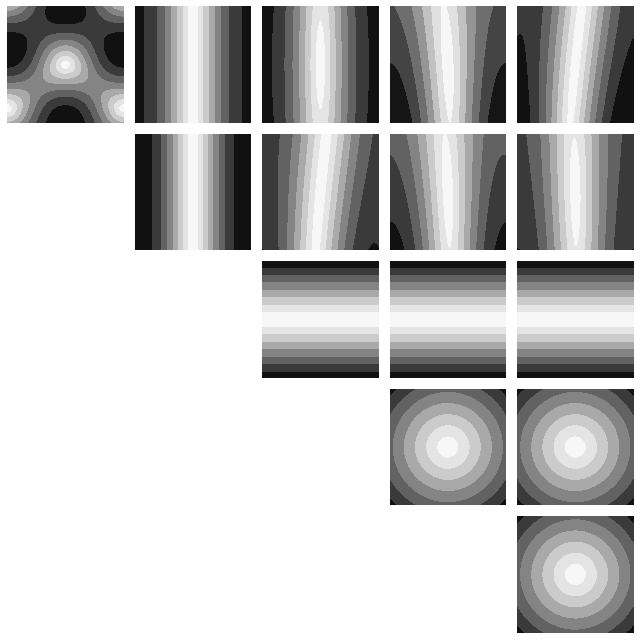

In [4]:
class ImuCost:
    def __init__(self, i, j):
        self.i = i
        self.j = j
    
    def cost(self, x, y):
        rph_bias = np.zeros(6)
        rph_bias[self.i] = x
        rph_bias[self.j] = y
        
        R_LI = transforms3d.euler.euler2mat(*(rph_true + rph_bias[:3]))
        b_imu = b_imu_true + rph_bias[3:]
        
        return mahalanobis(a_imu_true, accelerometer(R_LI, b_imu, np.zeros(3)), np.eye(3))

X, Y = np.meshgrid(np.linspace(-np.pi, np.pi), np.linspace(-np.pi, np.pi))

fig = plt.figure(figsize=(9, 9))
for i, j in itertools.combinations(range(6), 2):
    imu = ImuCost(i, j)
    Z = np.fromiter(map(imu.cost, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)
    
    ax = fig.add_subplot(5, 5, 5 * i + j)
    ax.contourf(X, Y, Z, cmap='Greys')
    ax.axis('off')
plt.tight_layout()

## Least-squares and the Kalman filter

Linear estimation example. Show how a prior distribution over state and a probabilistic observation model can be considered cost surfaces.

## Full state representation

Demonstrate what the distribution over parameters looks like as we add new observations.

Show convergence for different initializations...

## Quaternion error state representation

Demonstrate what the distribution over parameters looks like as we add new observations.

Show convergence for different initializations...

## Invariant state representation

Demonstrate what the distribution over parameters looks like as we add new observations.

Show convergence for different initializations...